# 1 задание 1 эксперимент 

In [1]:
%%bash
grep "KiB Mem : " 1/exp1/top.log | awk '{print $6 / 1024}' > 1/exp1/mem_info
grep "KiB Swap: " 1/exp1/top.log | awk '{print $5 / 1024}' > 1/exp1/swap_info

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def get_plot(mem_info_path, swap_info_path):
    mem_file = open(mem_info_path, "r")
    mem_data = np.array((list(map(lambda x: float(x.replace(",", ".")), mem_file.read().split("\n")[:-1]))))
    mem_file.close()
    
    swap_file = open(swap_info_path, "r")
    swap_data = np.array((list(map(lambda x: float(x.replace(",", ".")), swap_file.read().split("\n")[:-1]))))
    swap_file.close()

    osx = np.arange(1, 2 * len(mem_data), 2)
    plt.figure(figsize=(15, 7))    
    plt.plot(osx, mem_data, 'red', label='free_mem')
    plt.plot(osx, swap_data, 'blue', label='free_swap')
    plt.xlabel("time in seconds")
    plt.ylabel("free memory in mBs")
    plt.legend()

2358,69
2247,21
2142,83
2046,12
1912,49
1774,43
1638,31
1500,74
1364,65
1227,57
1091,48
971,387
867,535
762,207
656,879
554,012
434,41
307,918
175,273
99,0859
108,195
112,281
102,676
99,0273
103,383
114,984
113,762
3415,97
3392,06
3389,32
3388,5
3362,77
3362,54
3361,37
3361,37



ValueError: x and y must have same first dimension, but have shapes (0,) and (35,)

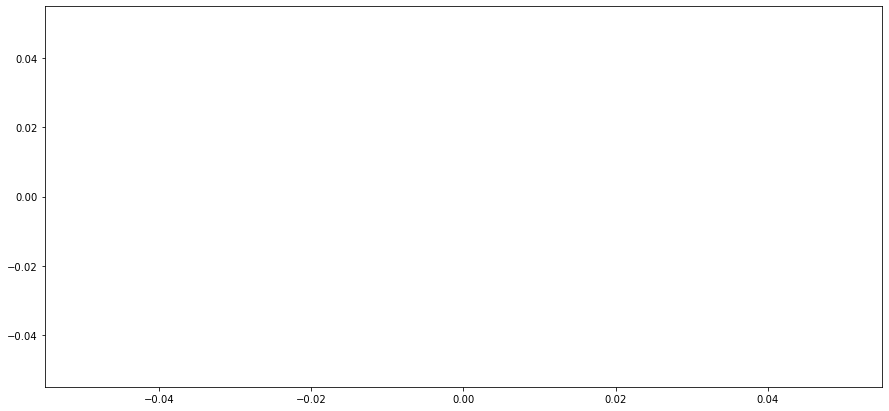

In [3]:
get_plot("1/exp1/mem_info", 
         "1/exp1/swap_info")


In [97]:
print("""
 PID USER      PR  NI    VIRT    RES    SHR S %CPU %MEM     TIME+ COMMAND
 1592 savva     20   0  542576 525768   3164 R 88,9 13,4   0:08.89 mem.sh
 1002 savva     20   0 3018732 297708 114632 S  0,0  7,6   0:08.19 gnome-shell
 1384 savva     20   0 1083768 165440  36212 S  0,0  4,2   0:02.79 gnome-softw+
  625 root      20   0  468604  93520  55812 S  0,0  2,4   0:01.57 Xorg
 1308 savva     20   0  894460  67560  27480 S  0,0  1,7   0:00.22 evolution-c+

Заметим, что наш процесс выходит на первую строчку почти сразу после его запуска, и начинает линейно кушать оперативную память, пока она не закончится. Как только она кончается, он копирует данные в swap раздел. Потом когда процесс становится убит системой память возобновляется.""")


 PID USER      PR  NI    VIRT    RES    SHR S %CPU %MEM     TIME+ COMMAND
 1592 savva     20   0  542576 525768   3164 R 88,9 13,4   0:08.89 mem.sh
 1002 savva     20   0 3018732 297708 114632 S  0,0  7,6   0:08.19 gnome-shell
 1384 savva     20   0 1083768 165440  36212 S  0,0  4,2   0:02.79 gnome-softw+
  625 root      20   0  468604  93520  55812 S  0,0  2,4   0:01.57 Xorg
 1308 savva     20   0  894460  67560  27480 S  0,0  1,7   0:00.22 evolution-c+

Заметим, что наш процесс выходит на первую строчку почти сразу после его запуска, и начинает линейно кушать оперативную память, пока она не закончится. Как только она кончается, он копирует данные в swap раздел. Потом когда процесс становится убит системой память возобновляется.


In [45]:
%%bash
cat 1/exp1/dmesg.txt

[  198.252330] mem.sh invoked oom-killer: gfp_mask=0x100cca(GFP_HIGHUSER_MOVABLE), order=0, oom_score_adj=0
[  198.252334] CPU: 0 PID: 1592 Comm: mem.sh Tainted: G           O      5.4.0-53-generic #59~18.04.1-Ubuntu
[  198.252527] [   1592]  1000  1592   868607   863470  6995968      167             0 mem.sh
[  198.252535] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/,task=mem.sh,pid=1592,uid=1000
[  198.252542] Out of memory: Killed process 1592 (mem.sh) total-vm:3474428kB, anon-rss:3453880kB, file-rss:0kB, shmem-rss:0kB, UID:1000 pgtables:6832kB oom_score_adj:0
[  198.520487] oom_reaper: reaped process 1592 (mem.sh), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB


In [72]:
%%bash
echo "Количество элементов в массиве: $(tail -1 1/exp1/report.log)"

Количество элементов в массиве: 44200000


# 1 задание 2 эксперимент

In [77]:
%%bash
grep "KiB Mem : " 1/exp2/top.log | awk '{print $6 / 1024}' > 1/exp2/mem_info
grep "KiB Swap: " 1/exp2/top.log | awk '{print $5 / 1024}' > 1/exp2/swap_info

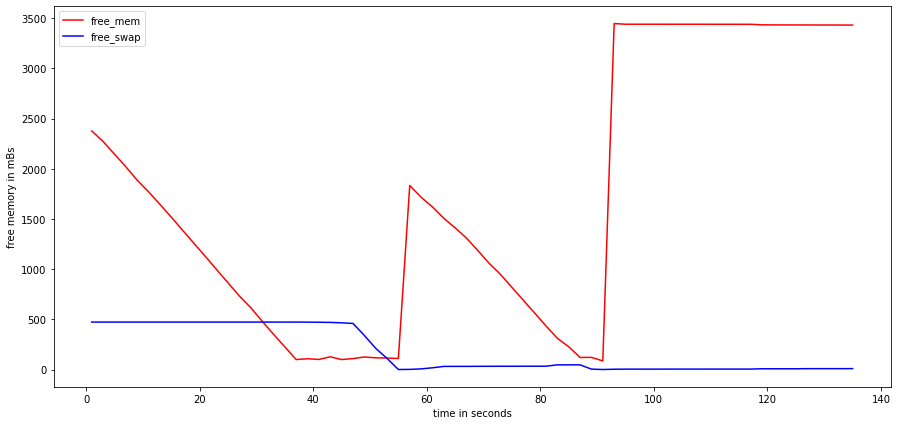

In [78]:
get_plot("1/exp2/mem_info", 
         "1/exp2/swap_info")

In [93]:
print("""
KiB Mem :  3932600 total,  2325488 free,   976756 used,   630356 buff/cache
KiB Swap:   483800 total,   483800 free,        0 used.  2711080 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S %CPU %MEM     TIME+ COMMAND
 1011 savva     20   0 3005116 291336 111912 S  0,0  7,4   0:23.80 gnome-shell
 1342 savva     20   0 1086524 168836  36988 S  0,0  4,3   0:03.03 gnome-softw+
 1577 savva     20   0  116612  99984   3108 R 47,1  2,5   0:01.69 mem2.sh
 1576 savva     20   0  104732  88072   3168 R 47,1  2,2   0:01.69 mem1.sh
  630 savva     20   0  446072  86004  51148 S  0,0  2,2   0:01.63 Xorg

Сразу процессы становятся топ 1-2 по выделенной памяти.""")


KiB Mem :  3932600 total,  2325488 free,   976756 used,   630356 buff/cache
KiB Swap:   483800 total,   483800 free,        0 used.  2711080 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S %CPU %MEM     TIME+ COMMAND
 1011 savva     20   0 3005116 291336 111912 S  0,0  7,4   0:23.80 gnome-shell
 1342 savva     20   0 1086524 168836  36988 S  0,0  4,3   0:03.03 gnome-softw+
 1577 savva     20   0  116612  99984   3108 R 47,1  2,5   0:01.69 mem2.sh
 1576 savva     20   0  104732  88072   3168 R 47,1  2,2   0:01.69 mem1.sh
  630 savva     20   0  446072  86004  51148 S  0,0  2,2   0:01.63 Xorg

Сразу процессы становятся топ 1-2 по выделенной памяти.


In [90]:
%%bash
echo "Размер 1 массива до краша $(tail -1 1/exp2/report1.log)"
echo "Размер 2 массива до краша $(tail -1 1/exp2/report2.log)"

Размер 1 массива до краша 44800000
Размер 2 массива до краша 23400000


In [98]:
%%bash
cat 1/exp2/dmesg.txt

[  192.927920] [   1576]  1000  1576   418124   413175  3391488        0             0 mem1.sh
[  192.927921] [   1577]  1000  1577   463895   458946  3756032        0             0 mem2.sh
[  192.927927] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/,task=mem2.sh,pid=1577,uid=1000
[  192.927934] Out of memory: Killed process 1577 (mem2.sh) total-vm:1855580kB, anon-rss:1835784kB, file-rss:0kB, shmem-rss:0kB, UID:1000 pgtables:3668kB oom_score_adj:0
[  193.140768] oom_reaper: reaped process 1577 (mem2.sh), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB
[  234.594055] [   1576]  1000  1576   880454   874857  7098368      680             0 mem1.sh
[  234.594062] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/,task=mem1.sh,pid=1576,uid=1000
[  234.594068] Out of memory: Killed process 1576 (mem1.sh) total-vm:3521816kB, anon-rss:3499428kB, file-rss:0kB, shmem-rss:0kB, UID:1000 pgtables:69

# 2 Задание

При k = 10 и n = 4090000 - работает норм.
Убедимся, что при k = 30 это неверно


In [6]:
%%bash
cat 2/dmesg30.txt

[  888.274655] newmem.sh invoked oom-killer: gfp_mask=0x100cca(GFP_HIGHUSER_MOVABLE), order=0, oom_score_adj=0
[  888.274659] CPU: 0 PID: 2215 Comm: newmem.sh Tainted: G           O      5.4.0-53-generic #59~18.04.1-Ubuntu
[  888.275028] [   2172]  1000  2172    33377    28449   307200        0             0 newmem.sh
[  888.275030] [   2173]  1000  2173    33113    28191   303104        0             0 newmem.sh
[  888.275031] [   2174]  1000  2174    33344    28406   311296        0             0 newmem.sh
[  888.275032] [   2175]  1000  2175    33377    28428   303104        0             0 newmem.sh
[  888.275033] [   2176]  1000  2176    33146    28195   303104        0             0 newmem.sh
[  888.275035] [   2177]  1000  2177    32981    28006   311296        0             0 newmem.sh
[  888.275036] [   2178]  1000  2178    33344    28392   311296        0             0 newmem.sh
[  888.275037] [   2179]  1000  2179    33212    28262   294912        0             0 newmem.sh
[